# Mandatory Assignment 2: Sampling Customers

**This is the second of three mandatory assignments to be handed in as part of the assessment for the course 02807 Computational Tools for Data Science at Technical University of Denmark, autumn 2019.**

#### Practical info
- **The assignment is to be done individually. You are under no circumstances allowed to collaborate with anyone on solving the exercises (cf. the full policy on this on the course website)**
- **You must hand in one Jupyter notebook (this notebook) with your solution**
- **The hand-in of the notebook is due 2019-11-10, 23:59 on DTU Inside**

#### Your solution
- **Your solution should be in Python**
- **You may use more cells than the provided ones for your answers**
- **You should not remove the problem statements**
- **Your notebook should be runnable, i.e., clicking [>>] in Jupyter should generate the result that you want to be assessed**

---
## Introduction
When computing group aggregates from a sample, simple random sampling does not give good results. Instead, a representative sample can be obtained by storing each record seen from a sample of the elements we group by. 

In this assignment you should implement this sampling method on a stream of customer spendings.

### Example
Suppose you are sampling from a stream of customer spendings. Each element of the stream consists of a customer ID and an amount. For example:

`123e4567-e89b-12d3-a456-426655440000 29.99`

To obtain a representative sample, you should sample some customer IDs and make sure that every occurrence of the sampled customer IDs are in your final sample. For example, if the customer ID `123e4567-e89b-12d3-a456-426655440000` is among the sampled customer IDs, every element with this ID should be in your sample. 

## Reading the stream
The following code reads a remote file line by line. It is wrapped in a generator to make it easier to extend. You should design your algorithm to read from the generator as a stream. You may extend or modify this to fit your requirements.

In [1]:
import urllib

def stream(n):
    i = 0
    with urllib.request.urlopen('https://files.dtu.dk/fss/public/link/public/stream/read/spending?linkToken=wkMPLdtDDyvQQw8o&itemName=spending') as f:
        for line in f:
            element = line.rstrip().decode("utf-8")
            splitted = element.split(" ")
            yield splitted
            i += 1
            if i == n:
                break

In [2]:
STREAM_SIZE = 100
customer_stream = stream(STREAM_SIZE),

## Exercise 1
Implement an algorithm that computes a sample from the stream. The sample must be representative of customers, i.e., you should be able to answer group aggregate questions from it.

The sample size should be approximately 10% of the number of elements read from the stream.

It is important that your algorithm is a streaming algorithm. This means that your algorithm should update the sample every time an element from the stream is processed, and you should also only process the stream once.

### Hints
Hint 1: Since simple random sampling is not a good idea, you should not use the reservoir sampling algorithm.

Hint 2: The sample does not have to be exactly $k$ elements.

Hint 3: You should use a hash function and the fact that it can be used to uniformly map elements from a large universe to a smaller domain. Murmurhash3 (`mmh3`) is a suitable hash function from strings to integers for this.

In [3]:
# Your code here
from mmh3 import hash
import sys
dic = {}
STREAM_SIZE = 10000
for ids, price in stream(STREAM_SIZE):
    if hash(ids, 1) < 0:
        hashed = hash(ids, 1) % ((sys.maxsize + 1) * 2)
        if hashed % 10 == 2:
            price = float(price)
            if ids in dic.keys():
                dic[ids][0] += price
                dic[ids][1] += 1
            else:
                dic[ids] = [price, 1]
            
    if hash(ids, 1) % 10 == 2:
        price = float(price)
        if ids in dic.keys():
            dic[ids][0] += price
            dic[ids][1] += 1
        else:
            dic[ids] = [price, 1]

HTTPError: HTTP Error 404: Not Found

In [4]:
dic

{'93d3d757-5077-4b03-9081-485139f3d8ff': [2447.13, 17],
 '783c9e1d-6c5a-4050-b154-730e08d6277a': [2493.57, 17],
 '70e21281-939b-454e-b08f-85a251dc73ae': [2971.5599999999995, 19],
 '1e236dc0-b477-40be-a171-91cfe5226cb4': [792.8799999999999, 12],
 '7728c873-7b15-4b11-94b7-c056aa0afbf2': [1372.59, 16],
 'f61e7293-747a-4834-8430-fb3dc2455296': [1555.14, 14],
 'a1797acb-9f2a-4492-81b1-5a938b27200c': [2497.0400000000004, 20],
 'cbd0ebaa-66be-443f-8a1e-f0552fd5b83a': [1258.92, 12],
 '3e5fd4eb-c111-4737-a29b-7614f941af0a': [1594.1299999999999, 17],
 'f1086507-d472-4e1a-a00a-4219798f5bab': [2231.17, 23],
 'eee3166d-859d-4911-9699-356134a205e1': [2073.89, 18],
 'b8a7bea7-a55e-4f63-9408-d7b0008df6c7': [1277.2200000000003, 12],
 '85dd5f6b-0826-4b3f-9a4f-054d6d40cbe4': [866.94, 14],
 '40febaa0-5fe5-4f8f-aa01-d5ab3c1587fb': [1016.06, 12],
 '91e521d3-b618-4569-a9c7-c01b98daac9e': [1136.9, 14],
 '5ecb085a-6cd3-42f9-a27e-853270fa37e9': [1264.4, 17],
 '93e3e0dd-fbb2-494e-aae0-d3902b8fb0f5': [1877.739999

_**Comments on code & Explanation:**_
- **I have splitted stream data as customer id and customer spendings. In order to obtain sample size of 10% approximately, I used hash function as it is recommended. One of our aim is to obtain every purchase of a customer if this unique customer is in our sample. Hash function satisfies this requirement as well. My algorithm updates itself with its counter and it sums purchase price as well for each customer in the sample. Let's explain the code, after receiving id and price seperately, I hash id. If the hashed id is less than zero, I return that value to positive specific value with system maximize but I add 1 and multiply with 2 to obtain 2 ** 64 because maxsize is 2 ** 63 - 1. Then using % 10 and only obtaining the values of "2" is yielding me only 10% of data approximately. Then I create a dictionary which has key value as customer id's and values as spending amounts and counts of transactions times. (Spending amounts are summed values of each customer id's.)**

## Exercise 2
Use the sample obtained in the previous exercise to answer the following question.

- What is the average total spending per customer?

In [11]:
# Your code here
Total_Spending = 0
Unique_ID_Count = 0
Average = 0
for key, value in dic.items():
    Total_Spending += value[0] 
Unique_ID_Count = len(dic.keys())
Average = Total_Spending / Unique_ID_Count
print("Average total spending per customer is %.3f." %Average)

Average total spending per customer is 1495.962.


### Exercise 3
Explain why simple random sampling would not give as good an answer to the question in exercise 2 as your new algorithm does.

Hint: Look at the distribution of amounts for some customer in your sample.

_**Explanation before code:**_
- **Simple random sampling will select the customer ids so randomly that, it won't be a good represntative sample from the whole data. For example, a customer might have spendings like [10, 10, 15, 1000, 10, 10, 1500, 10, 5, 15]. Simple random sampling might choose just the values such as [10, 15] or [1000, 1500]. Therefore representation of this data will lead misleading results. But my algorithm above is obtaining all spendings related to a customer. Assuming there are roughly the same number of transactions per customer my sample will be a good representative of data. Let's see in the code and in the graph as well.**

_**Let's look at the distribution of amounts for some customer in my sample.**_

- **I will select data which is between the percentiles of 20th and 80th. Aim for selecting percentiles is to get rid of outliers from database.**

In [5]:
# Your code and explanation here
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from scipy.stats import norm

counter = []
customer_ids = []
for ids, values in dic.items():
    counter.append(values[1])

In [6]:
print("Customer Id counter mean is: ", np.mean(counter), "\nCustomer Id counter standard deviation is: ", np.std(counter), 
      "\nCustomer Id counter 50th percentile is: ", np.percentile(counter, 50), "\nCustomer Id counter 20th percentile is: ", 
      np.percentile(counter, 20),"\nCustomer Id counter 80th percentile is: ",  np.percentile(counter, 80))

Customer Id counter mean is:  14.666666666666666 
Customer Id counter standard deviation is:  3.6336900946150736 
Customer Id counter 50th percentile is:  14.0 
Customer Id counter 20th percentile is:  12.0 
Customer Id counter 80th percentile is:  18.0


In [7]:
th_20 = np.percentile(counter, 20) 
th_80 = np.percentile(counter, 80)
dic2 = {}
dic2 = {key:val for key, val in dic.items() if val[1] > th_20 and val[1] < th_80}

**_Now, I have created a new dictionary database which only consist of the customer ids which has count values between the 20th and 80th percentiles_**

In [8]:
counter2 = []
customer_ids = []
for ids, values in dic2.items():
    counter2.append(values[1])
    customer_ids.append(ids)

**_Above code, created the new counter list and customer id list to plot them below_**

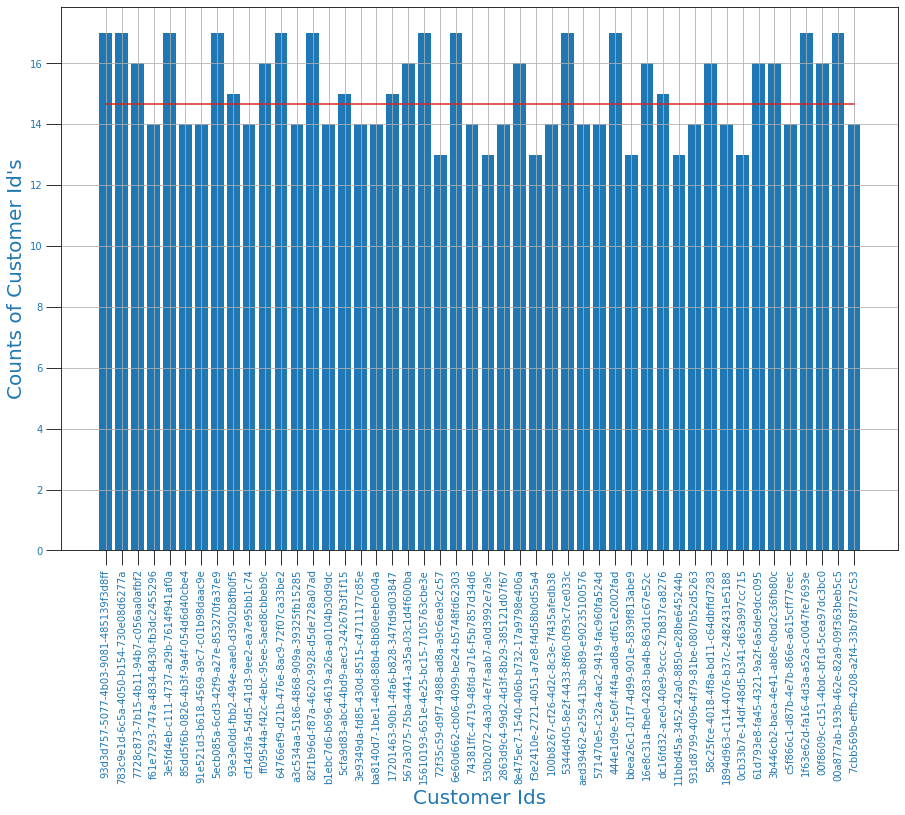

In [9]:
counter_mean = np.mean(counter)
mean_vector = [counter_mean for i in range(len(customer_ids))]

fig, ax1 = plt.subplots(figsize=(15, 10))

color = 'tab:blue'
ax1.set_ylabel("Counts of Customer Id's", color=color, size=20) 
ax1.set_xlabel('Customer Ids', color=color, size=20)
ax1.bar(x = customer_ids, height = counter2)
ax1.tick_params(axis='y', labelcolor=color, size=15)
ax1.tick_params(axis='x', labelcolor=color, size=15)
color2 = 'tab:red'
ax1.plot(range(0, len(customer_ids)),mean_vector, color=color2)
plt.xticks(rotation=90)
plt.grid(True)

**Above counts of each Customer Id (between specified percentiles) are plotted as bars. Red line above is the mean value of all counts for all customer ids (all percentiles included). Therefore I can say that bar heights are around this mean value. _(Nearly uniformly distributed.)_ As we have assumed before there are roughly the same number of transactions per customer in my sample, my assumption is true. Since my assumption is true, I can say that, my sample is a good representative of a huge stream data.**

# Now let's see how random sampling behaves:
- **I hava used reservoir sampling algortihm as a random sampling algorithm to obtain samples from the stream. Again I have created a dictionary database to further analyze.**

In [7]:
import sys
import random
def reservoir_sample(stream, n):
    res = []

    for i, el in enumerate(stream):
        if i < n:
            res.append(el)
        else:
            rand = random.sample(range(i), 1)[0]
            if rand < n:
                res[random.sample(range(n), 1)[0]] = el
    return res

In [8]:
Reservoir = reservoir_sample(stream(10000), 1000)

HTTPError: HTTP Error 404: Not Found

In [12]:
dic3 = {}
for iD, Pr in Reservoir:
        Pr = float(Pr)
        if iD in dic3.keys():
            dic3[iD][0] += Pr
            dic3[iD][1] += 1
        else:
            dic3[iD] = [Pr, 1]

In [13]:
Total_Spending_2 = 0
Unique_ID_Count_2 = 0
Average_2 = 0
for key, value in dic3.items():
    Total_Spending_2 += value[0] 
Unique_ID_Count_2 = len(dic3.keys())
Average_2 = Total_Spending_2 / Unique_ID_Count_2
print("Average total spending per customer is %.3f." %Average_2)
print("Total number of Customer Ids in database is %d." %len(dic3))

Average total spending per customer is 184.242.
Total number of Customer Ids in database is 539.


**Average spending per customer is relatively too low when we compare it with my algorithm above. Average spending is 185.133 but number of customers is relatively too large when we compare it with my algorithm above. Unique customer id count is 548 for random sampling. For my algorithm it is 108. Which again proves my explanation before the code; Representation of random sampling algoirtm will lead misleading results. But my algorithm above is obtaining all spendings related to a customer. Therefore it is better representating stream.**

- **P.S.:Since reservoir sampling algorithm is a sample random sampling algorithm, at every run samples will change.**

In [14]:
counter_3 = []
customer_ids_3 = []

for ids, values in dic3.items():
    counter_3.append(values[1])
    customer_ids_3.append(ids)

In [15]:
print("Customer Id counter mean is: ", np.mean(counter_3), "\nCustomer Id counter standard deviation is: ", np.std(counter_3), 
      "\nCustomer Id counter 50th percentile is: ", np.percentile(counter_3, 50), "\nCustomer Id counter 10th percentile is: ", 
      np.percentile(counter_3, 10),"\nCustomer Id counter 90th percentile is: ",  np.percentile(counter_3, 90), 
      "\nMaximum counts of Customer Id is:" ,max(counter_3), "\nMinumum counts of Customer Id is:", min(counter_3))

Customer Id counter mean is:  1.8552875695732838 
Customer Id counter standard deviation is:  0.9541554760130979 
Customer Id counter 50th percentile is:  2.0 
Customer Id counter 10th percentile is:  1.0 
Customer Id counter 90th percentile is:  3.0 
Maximum counts of Customer Id is: 5 
Minumum counts of Customer Id is: 1


**Since the counts of customer ids aren't so varied there I will just drop 10th and 90th percentiles. Then I will create a new dictionary database which will be just include samples between percentiles. Then like above, I will plot them with bars.**

In [19]:
th_10 = np.percentile(counter_3, 10) 
th_90 = np.percentile(counter_3, 90)
dic4 = {}
dic4 = {key:val for key, val in dic3.items() if val[1] >= th_10 and val[1] <= th_90}

In [17]:
counter_4 = []
customer_ids_4 = []
for ids, values in dic4.items():
    counter_4.append(values[1])
    customer_ids_4.append(ids)

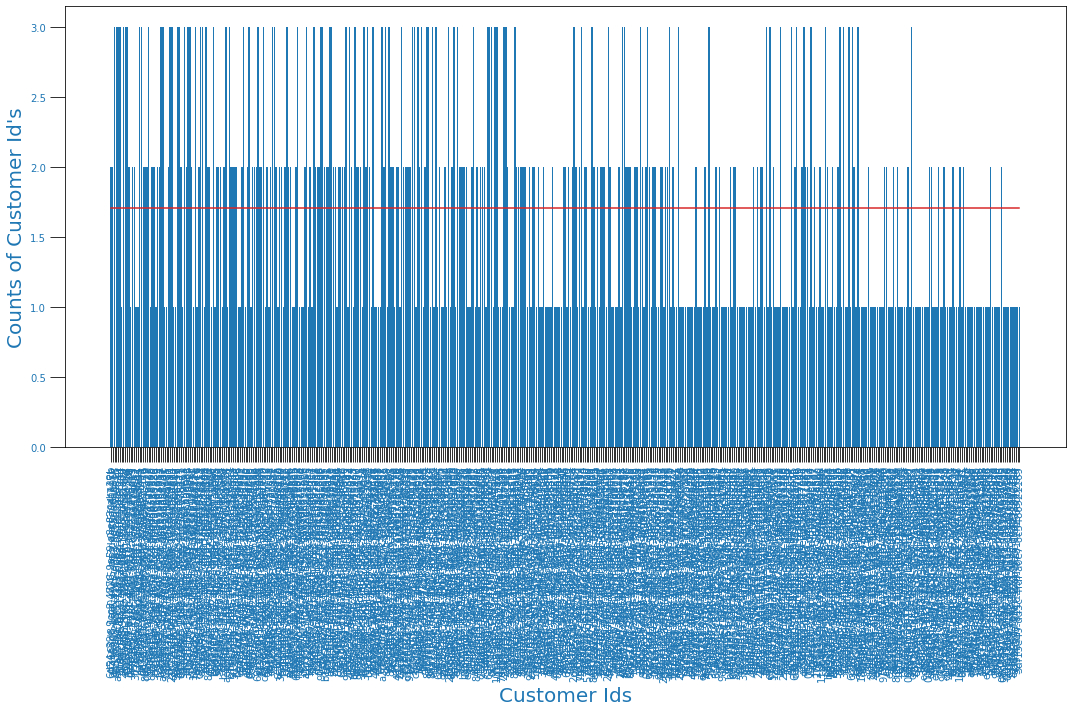

In [18]:
fig, ax1 = plt.subplots(figsize=(15, 10))

counter_mean2 = np.mean(counter_4)
mean_vector2 = [counter_mean2 for i in range(len(customer_ids_4))]


color = 'tab:blue'
ax1.set_ylabel("Counts of Customer Id's", color=color, size=20) 
ax1.set_xlabel('Customer Ids', color=color, size=20)
ax1.bar(x = customer_ids_4, height = counter_4)
ax1.tick_params(axis='y', labelcolor=color, size=15)
ax1.tick_params(axis='x', labelcolor=color, size=15)
color2 = 'tab:red'
ax1.plot(range(0, len(customer_ids_4)),mean_vector2, color=color2)
plt.xticks(rotation=90)
#plt.grid(True)

fig.tight_layout()
plt.show()

_Plot above is biased. Because most of Customer Ids has just one count in the database. Some of them has 2 count and barely some of them has 3 counts. This is what random sampling causes. It just randomly picks sales but doesn't care about the customer ids and result bad analysis as we have seen average spending for all customers._

**_As a conclusion:_**

**My algorithm in exercise 1 is creating a sample which is a better sample for the analysis of data. But random sampling is not a good representative of stream since it doesn't care about customer ids.**